In [37]:
#Loading wine dataset from url
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df_wine = pd.read_csv(url,names=['Target','Alcohol','Malic acid','Ash','Alcalinity of Ash','Magnesium','Total phenols',
                              'Flavanoids','Nonflavanoid Phenols','Proanthocyanins','Colour Intensity',
                              'Hue','OD280/OD315 of diluted wines','Proline'])
df_wine.head()

,Target,Alcohol,Malic acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Colour Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [38]:
# Defining X (input Samples) and y(Output Labels)
X = df_wine.drop(columns='Target')
y = df_wine['Target']


In [39]:
y.unique()

array([1, 2, 3])

In [40]:
# Lest split data intro training and testing
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=42, test_size=0.2)

## Original Tree

[Text(697.5, 978.48, 'Colour Intensity <= 3.82\ngini = 0.659\nsamples = 142\nvalue = [45, 57, 40]\nclass = 2'),
 Text(418.5, 761.0400000000001, 'Proline <= 1002.5\ngini = 0.109\nsamples = 52\nvalue = [3, 49, 0]\nclass = 2'),
 Text(279.0, 543.6, 'Ash <= 3.07\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]\nclass = 2'),
 Text(139.5, 326.1600000000001, 'gini = 0.0\nsamples = 49\nvalue = [0, 49, 0]\nclass = 2'),
 Text(418.5, 326.1600000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = 1'),
 Text(558.0, 543.6, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = 1'),
 Text(976.5, 761.0400000000001, 'Flavanoids <= 1.4\ngini = 0.577\nsamples = 90\nvalue = [42, 8, 40]\nclass = 1'),
 Text(837.0, 543.6, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]\nclass = 3'),
 Text(1116.0, 543.6, 'Proline <= 724.5\ngini = 0.269\nsamples = 50\nvalue = [42, 8, 0]\nclass = 1'),
 Text(976.5, 326.1600000000001, 'Malic acid <= 3.92\ngini = 0.198\nsamples = 9\nvalue = [1, 8, 0]\nclass = 2'),
 Text(837.0, 

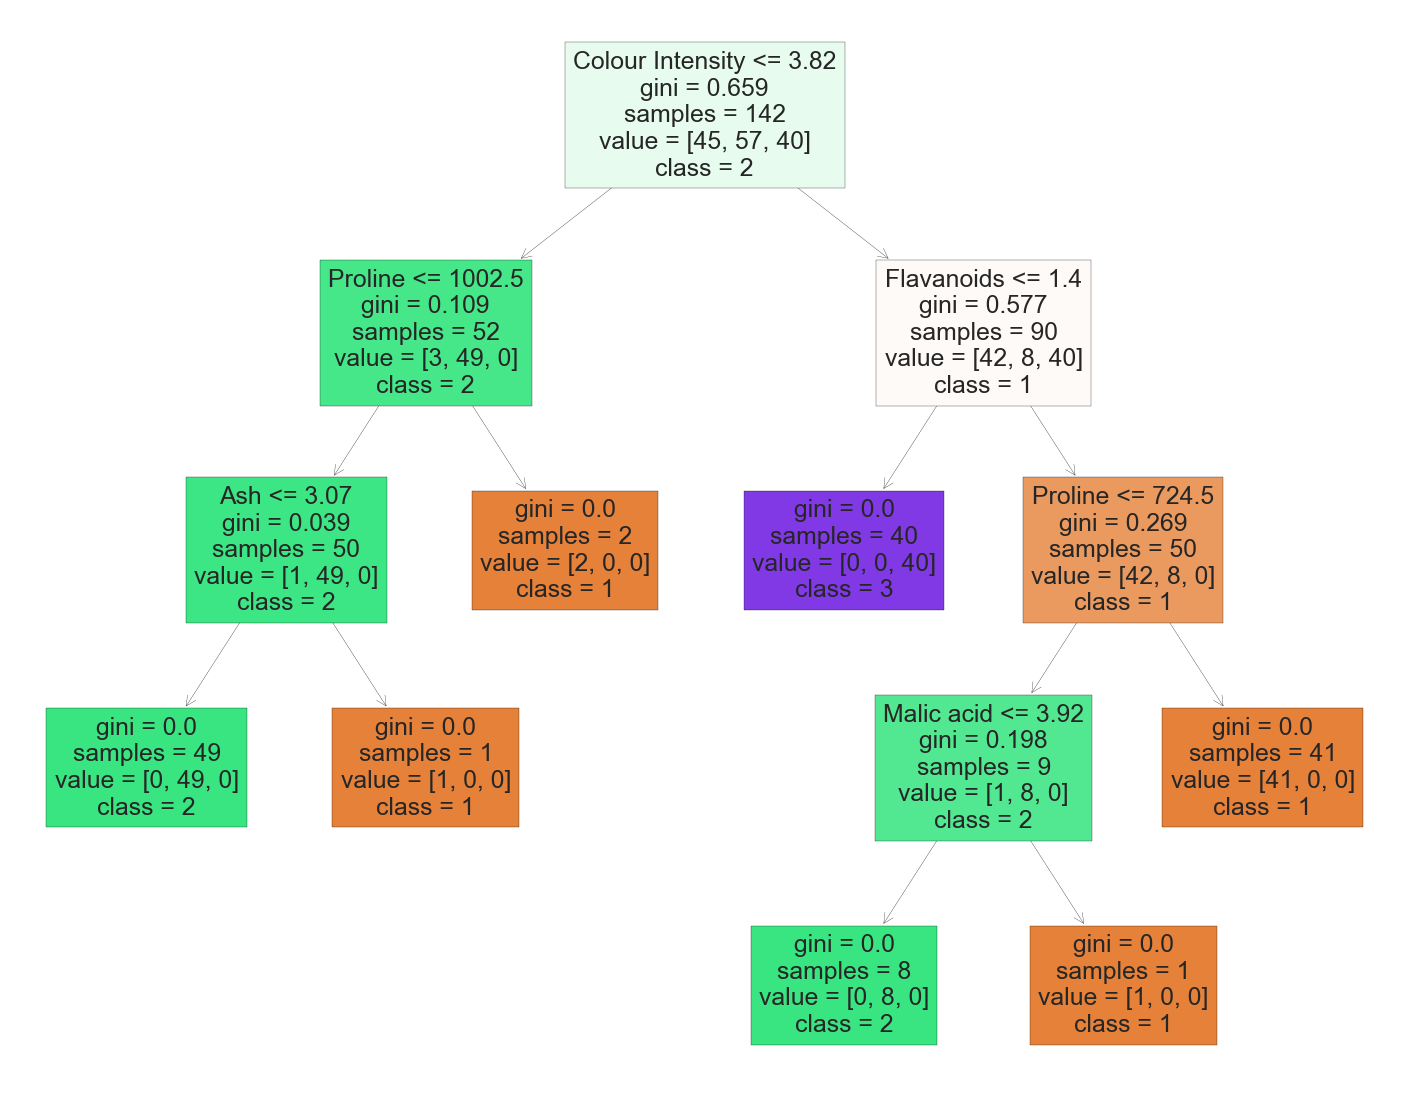

In [41]:
from sklearn import tree
org_tree = tree.DecisionTreeClassifier()
org_tree.fit(X_train,y_train)
fig = plt.figure(figsize=(25,20))
tree.plot_tree(org_tree,feature_names=X.columns,class_names=['1','2','3'], filled=True)

In [42]:
# Accuracy of Decision Tree
prediction = org_tree.predict(X_test)
accuracy_score_train = sklearn.metrics.accuracy_score(org_tree.predict(X_train),y_train)
accuracy_score_test = sklearn.metrics.accuracy_score(prediction,y_test)
print("Train Accuracy of Decision tree: {} | Test Accuracy : {}".format(accuracy_score_train,accuracy_score_test))
print("Max depth of Tree:",org_tree.tree_.max_depth)

Train Accuracy of Decision tree: 1.0 | Test Accuracy : 0.9444444444444444
Max depth of Tree: 4


## Pruning Tree

In [43]:
clf_wine_st1 = tree.DecisionTreeClassifier(max_depth=2)
clf_wine_st1.fit(X_train,y_train)
prediction = clf_wine_st1.predict(X_test)
accuracy_score_train = clf_wine_st1.score(X_train,y_train)
accuracy_score_test = clf_wine_st1.score(X_test,y_test)
print("Max depth of Tree: {} | Train Accuracy:{} | Test Accuracy: {}".format(clf_wine_st1.tree_.max_depth,accuracy_score_train,accuracy_score_test))
clf_wine_st2 = tree.DecisionTreeClassifier(max_depth=3)
clf_wine_st2.fit(X_train,y_train)
prediction = clf_wine_st2.predict(X_test)
prediction_train = clf_wine_st2.predict(X_train)
accuracy_score_test = sklearn.metrics.accuracy_score(prediction,y_test)
accuracy_score_train = sklearn.metrics.accuracy_score(prediction_train,y_train)
print("Max depth of Tree: {} | Train Accuracy: {} | Test Accuracy: {}".format(clf_wine_st2.tree_.max_depth,accuracy_score_train,accuracy_score_test))

Max depth of Tree: 2 | Train Accuracy:0.9366197183098591 | Test Accuracy: 0.8611111111111112
Max depth of Tree: 3 | Train Accuracy: 0.9929577464788732 | Test Accuracy: 0.9444444444444444


In [44]:
# using min_samples_leaf
clf_wine_st3 = tree.DecisionTreeClassifier(min_samples_leaf=5)
clf_wine_st3.fit(X_train,y_train)
accuracy_score_train=clf_wine_st3.score(X_train,y_train)
accuracy_score_test=clf_wine_st3.score(X_test,y_test)
print("Min Samples Leaf: {} | Train Accuracy: {} | Test Accuracy: {}".format(5,accuracy_score_train,accuracy_score_test))
clf_wine_st4 = tree.DecisionTreeClassifier(min_samples_leaf=10)
clf_wine_st4.fit(X_train,y_train)
accuracy_score_train=clf_wine_st4.score(X_train,y_train)
accuracy_score_test=clf_wine_st4.score(X_test,y_test)
print("Min Samples Leaf: {} | Train Accuracy: {} | Test Accuracy: {}".format(10,accuracy_score_train,accuracy_score_test))

Min Samples Leaf: 5 | Train Accuracy: 0.971830985915493 | Test Accuracy: 0.9444444444444444
Min Samples Leaf: 10 | Train Accuracy: 0.9647887323943662 | Test Accuracy: 0.9444444444444444


In [45]:
# using max_leaf_nodes
clf_wine_st5 = tree.DecisionTreeClassifier(max_leaf_nodes=3)
clf_wine_st5.fit(X_train,y_train)
accuracy_score_train=clf_wine_st5.score(X_train,y_train)
accuracy_score_test=clf_wine_st5.score(X_test,y_test)
print("Min Samples Leaf: {} | Train Accuracy: {} | Test Accuracy: {}".format(3,accuracy_score_train,accuracy_score_test))
clf_wine_st6 = tree.DecisionTreeClassifier(max_leaf_nodes=6)
clf_wine_st6.fit(X_train,y_train)
accuracy_score_train=clf_wine_st6.score(X_train,y_train)
accuracy_score_test=clf_wine_st6.score(X_test,y_test)
print("Min Samples Leaf: {} | Train Accuracy: {} | Test Accuracy: {}".format(6,accuracy_score_train,accuracy_score_test))

Min Samples Leaf: 3 | Train Accuracy: 0.9225352112676056 | Test Accuracy: 0.8611111111111112
Min Samples Leaf: 6 | Train Accuracy: 0.9929577464788732 | Test Accuracy: 0.9444444444444444


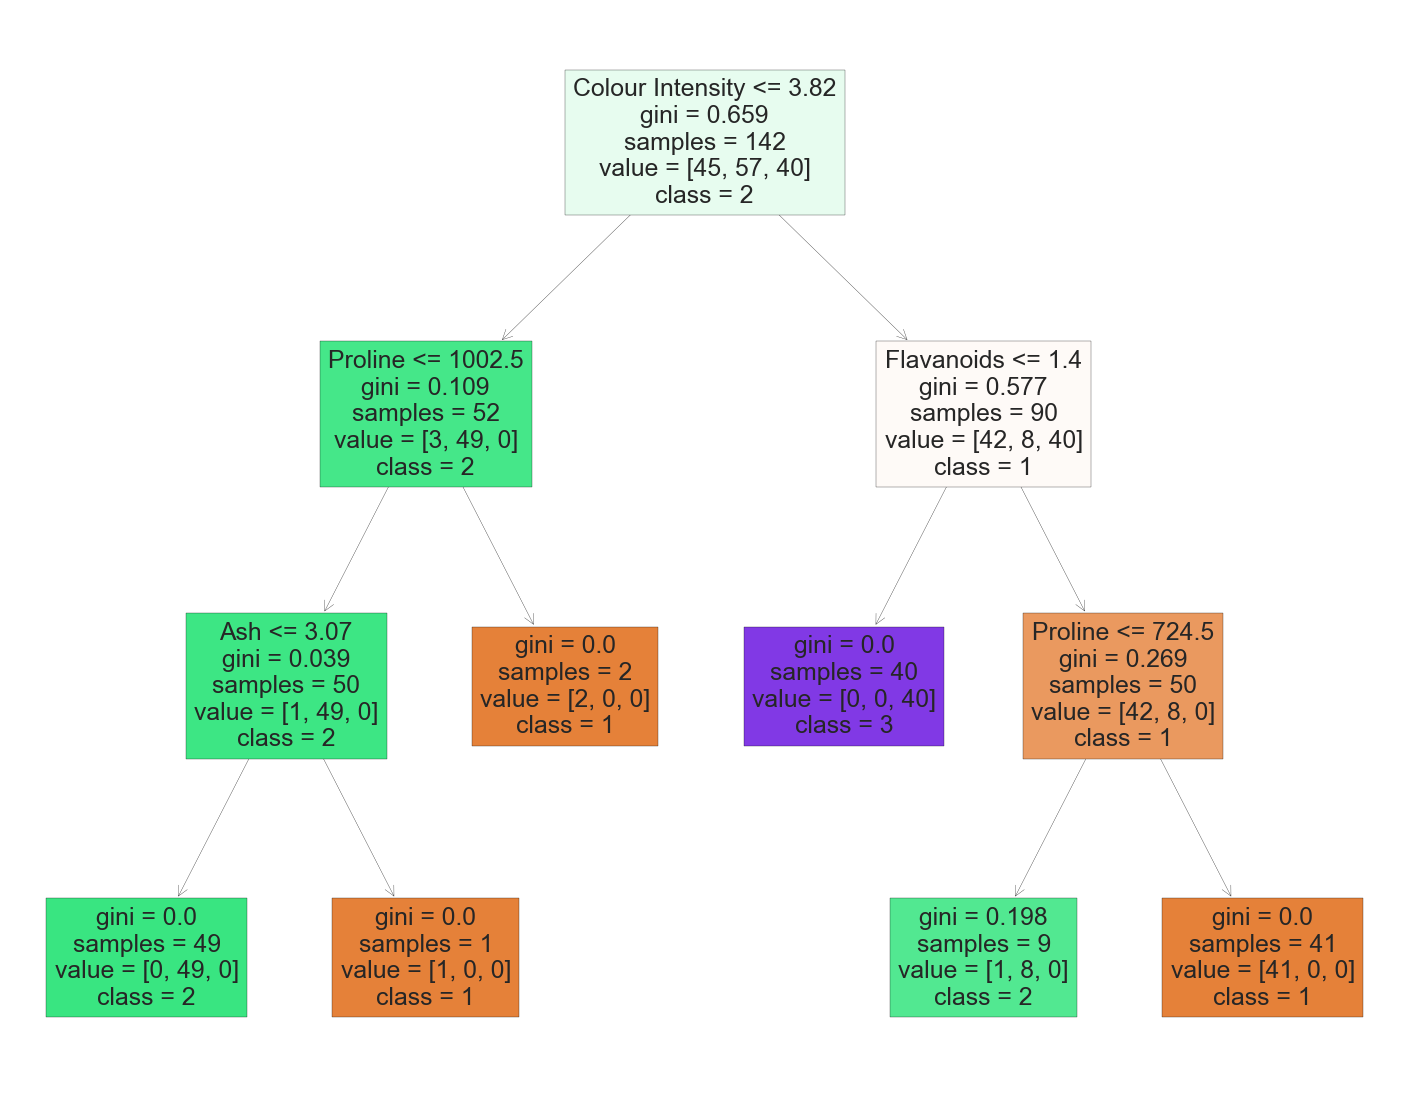

In [46]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_wine_st2, filled=True, feature_names=X.columns,class_names=['1','2','3'])

## Feature Importance

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


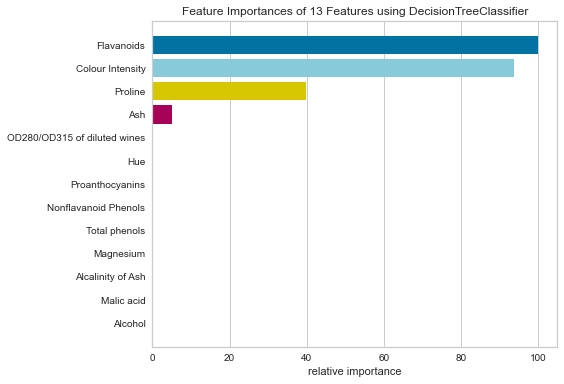

<AxesSubplot:title={'center':'Feature Importances of 13 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [49]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(clf_wine_st2)
viz.fit(X, y)
viz.show()

## Concolusion
With max depth=3 and model with max leaf nodes=6, we can achevie good training and testing accuracy thereby a good generalization. Originally the tree has 4 depths.